<ipython-input-2-3ad0a0973336>:11: RuntimeWarning: overflow encountered in exp
  z1 = np.log(1 + np.exp(-z))
<ipython-input-2-3ad0a0973336>:12: RuntimeWarning: overflow encountered in exp
  z2 = np.log(1 + np.exp(z))


Streaming output truncated to the last 5000 lines.
13682 0.004264614904015956
13683 0.006021808734581271
13684 0.003807951771867492
13685 0.010012694911971522
13686 0.004971163888655751
13687 0.007580856863084688
13688 0.004225088577756174
13689 0.005925862705808574
13690 0.003773791033664396
13691 0.009753691352626015
13692 0.0048701051649521305
13693 0.007354687733009524
13694 0.004147763134893654
13695 0.005741846567162536
13696 0.003718573733147541
13697 0.009317513985251614
13698 0.0047163798188778645
13699 0.007014260899294637
13700 0.004041216662738138
13701 0.005487714953633113
13702 0.0036483605545113386
13703 0.008740354458341267
13704 0.004524846218609027
13705 0.006587982780615009
13706 0.00391597300881493
13707 0.005185410679076086
13708 0.008037937741290566
13709 0.00434989005713368
13710 0.006216611338192445
13711 0.0038307902700166203
13712 0.010371813137408526
13713 0.005083126405385233
13714 0.007810505336473413
13715 0.004268045808214326
13716 0.006024841398445902
13

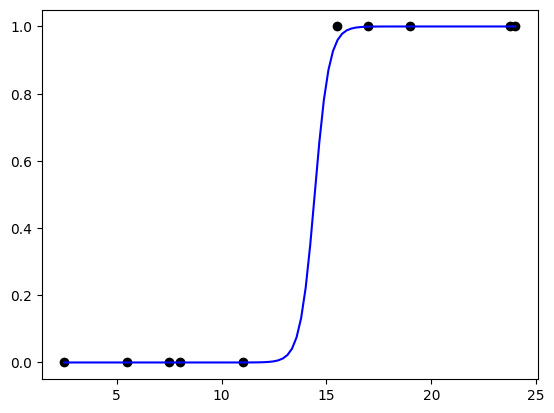

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_in = np.array([2.5, 5.5, 7.5, 8, 11, 15.5, 17, 19, 23.75, 24])
y_in = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=np.int8)
y1_in = 1 - y_in
z_in = np.array([40, 23.25, 17, 21, 10, 12, 20, 12, 15, 26])

def objective_function(w):
    z = w[0] + w[1] * x_in + w[2] * z_in
    z1 = np.log(1 + np.exp(-z))
    z2 = np.log(1 + np.exp(z))
    return np.dot(y_in, z1) + np.dot(y1_in, z2)

def gradient_function(w):
    hi = 1 / (1 + np.exp(-w[0] - w[1] * x_in - w[2] * z_in))
    yh = hi - y_in
    return np.array([np.sum(yh), np.dot(yh, x_in), np.dot(yh, z_in)])

def line_search(objective_function, gradient, x):
    beta = .1
    stepsize = 1
    trial = 100
    tau = .5
    for i in range(trial):
        fx1 = objective_function(x)
        fx2 = objective_function(x - stepsize * gradient)
        c = -beta * stepsize * np.dot(gradient, gradient)
        if fx2 - fx1 <= c:
            break
        else:
            stepsize = tau * stepsize
    return stepsize

maxit = 1000000
epsilon = 1.e-3

w = np.array([-2, 3, 1])
for i in range(maxit):
    gradient = gradient_function(w)
    b = np.linalg.norm(gradient)
    if b < epsilon:
        break
    stepsize = line_search(objective_function, gradient, w)
    w = w - stepsize * gradient
    print(i, b)

minimum_value = objective_function(w)

print("Minimum value:", minimum_value)
print("Minimum location:", w)
print("iteration:", i)

x_plot = np.linspace(2.5, 24, 100)
z = np.zeros(x_plot.size)
p = np.zeros(x_plot.size)
z[:] = -w[0] - w[1] * x_plot[:] - w[2] * np.mean(z_in)
p[:] = 1 / (1 + np.exp(z[:]))
plt.scatter(x_in, y_in, color='black')
plt.plot(x_plot, p, color='blue')
plt.savefig('log_regression3.tif', dpi=1200)
plt.show()
